## 모델에 사용될 이미지 전처리
- h5 모델 제작할때와 같은 상황을 만들어야함.
- h5 모델에 들어간 자료는 
 - 사이즈는 28*28
 - 그레이스케일(2차원)
 - 배경이 어둡고 내용이 밝다. 
 - 0~1사이 값 (/255하겠다)
 - 28*28을 (1,784)로 변경

In [ ]:
# image를 흑백으로 변환
imgGray=img.convert('L')
np.shape(imgGray)

(431, 166)

In [ ]:
# 이미지 관련 모듈은 대표적으로 PIL과 openCV가 있음. openCV는 욜로와함께 다양하게 사용됨. 영상물에서의 이미지 검출도 openCV
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('number.png')
img.size  # PIL은 너비와 높이로 나옴
np.shape(img)

(431, 166, 3)

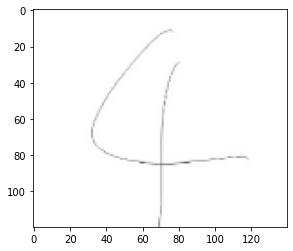

In [ ]:
# image crop  'PILLOW에서 그림자르기
# image.crop(시작하는 왼쪽위치,시작하는 위쪽위치)
img1 = img.crop((0,0,166,100))
img2 = img.crop((0,130,140,250))
img3 = img.crop((20,320,130,430))
plt.imshow(img2)

(1, 784)

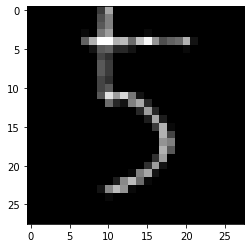

In [ ]:
# plt.imshow에 들어가는 자료는 반드시 색상숫자값이어야함. 이미지를 숫자로 변경하려면 array로 변경해야함
# 사이즈 변경
im1_re1=img3.resize((28,28))  # 열 이미지, 행 이미지
#그레이스케일 변경
img_gr1=im1_re1.convert('L')
np.shape(img_gr1)   # 행, 열의 크기가 표시  # 그레이스케일 확인
#이미지 변경
import PIL.ImageOps
img_con_1=PIL.ImageOps.invert(img_gr1)
plt.imshow(np.array(img_con_1),cmap='gray')

# 0-1사이값이다. 모델링 작업에서한 스케일링과 똑같이 해야함
img_sc_1=np.array(img_con_1)/255
plt.imshow(img_sc_1,cmap='gray')

# 28*28을 (1,784)로 변경
img_re_1=img_sc_1.reshape(1,-1)
img_re_1.shape

## 숫자인식하는 h5모델을 불러오고 그 모델에 img_re_1을 넣어서 예측을 해보려함

In [ ]:
import tensorflow as tf
load_model=tf.keras.models.load_model('my_mnist.h5')
load_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
result = load_model.predict(img_re_1)
print(result)   # 모델작성할때 최종 레이어의 dense의 유닛갯수가 10개 (y_train값의 unique갯수와 같음)여서 그 10개에 각각의 비중이 출력됨
print(np.argmax(result))

[[0.01899907 0.07737101 0.10254265 0.02572637 0.08468637 0.10099469
  0.11472031 0.00950799 0.44183627 0.02361532]]
8


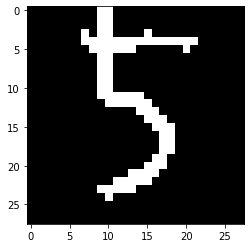

In [ ]:
tmp=img_re_1
for cnt in range(len(tmp[0])):
  #print(tmp[0][cnt])
  if tmp[0][cnt]!=0.0:
    tmp[0][cnt]=1.0


plt.imshow(tmp.reshape(28,28),cmap='gray')


In [ ]:
result1 = load_model.predict(tmp)
print(result1)   # 모델작성할때 최종 레이어의 dense의 유닛갯수가 10개 (y_train값의 unique갯수와 같음)여서 그 10개에 각각의 비중이 출력됨
print(np.argmax(result1))

[[2.1974184e-22 2.2321767e-10 1.8314673e-12 1.1334455e-04 6.5584275e-22
  9.9954420e-01 4.6571227e-13 1.0236165e-19 3.4240572e-04 5.8397393e-12]]
5
